In [1]:
from pipeNetwork import pipeNetwork
from containerClass import container
import numpy as np
from scipy.integrate import solve_ivp
import igraph
from calcTw import calcTw
from calcQ import calcQ
from containerClass import container
#from systemDefinitions import system,nodes,nodes1,pipeSections,pipeSections1
from systemDefinitions import system,pipeSections,pipeSections1, pipeSections3,orificeDiam3,pipeSections4,pipeSections0,orificeDiam0,pipeSections5
from orificeForward import main_nozzle_forward, mass_critical
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root
#!pip install --user --upgrade pixiedust

In [2]:
import pixiedust

Pixiedust database opened successfully


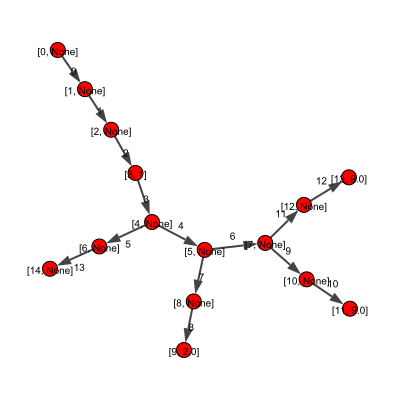

In [5]:
#%%pixie_debugger
net1 = pipeNetwork()
net1.addAllPipes(pipeSections3,orificeDiam3)
net0 = pipeNetwork()
net0.addAllPipes(pipeSections0,orificeDiam0)

net1.t.es["MFR"] = 10
net1.t.es["P0i"] = 1
net1.t.es[6]["P0i"] = 2
net1.t.vs["calculated"] = False
net1.propagateMFR(net1.t.vs[5],net1.t.es[6],net1.t.es[7])
net1.commonNode = 3
net1.t.vs[net1.commonNode]["MFR"] = 1

net1.plot("MFR","index")

igraph.Vertex(<igraph.Graph object at 0x000000000BD8B7C8>, 9, {'type': 'nozzle', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0.25, 'MFR': 0.25, 'calculated': False, 'name': 305})
igraph.Vertex(<igraph.Graph object at 0x000000000BD8B7C8>, 11, {'type': 'nozzle', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0.28125, 'MFR': 0.25, 'calculated': False, 'name': 301})
igraph.Vertex(<igraph.Graph object at 0x000000000BD8B7C8>, 13, {'type': 'nozzle', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0.128, 'MFR': 0.25, 'calculated': False, 'name': 302})
igraph.Vertex(<igraph.Graph object at 0x000000000BD8B7C8>, 14, {'type': 'nozzle', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0.344, 'MFR': 0.25, 'calculated': False, 'name': 304})
([9, 8, 5], 3)
([11,

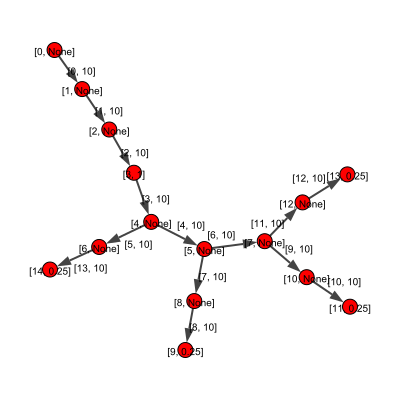

In [10]:
nozzles = net1.t.vs.select(_outdegree = 0)
for i in nozzles:
    i["MFR"] = net1.t.vs[net1.commonNode]["MFR"]/len(nozzles)
    i["calculated"] = False
    print(i)

for noz in nozzles:
    if noz['calculated'] == False:
        next =net1.findNext(noz,net1.t.es.select(_target = noz.index)[0])
        
    
net1.plot('MFR','MFR')

In [ ]:
net1.t.vs[1]['M'] = 0.2
net1.t.vs[1]['T0'] = 300
net1.t.vs[1]['P0'] = 10000
net1.t.vs[1]['P'] = 9000
net1.t.vs[1]['T'] = 273
net1.t.vs[1]['rho'] = 1.0
net1.t.es['L'] = 19
net1.t.es['D'] = 0.1
#net1.t.es['f'] = 0.005
net1.Tw = 300
net1.t.vs[4]

In [ ]:
net1.calcAfterOrifice(1,2,3,4,5,6,7,8,9)

In [ ]:
net1.calcBeforeOrifice(1,2,3,4,5,6,7,8,9)

In [ ]:
%%pixie_debugger
firstTank = net1.firstTank
tank1 = net1.t.vs[firstTank]
tank1Valve = net1.t.vs[firstTank].successors()[0]
initialMdot0Guess = net1.Mdot0
net1.t.es.select(_source = tank1.index, _target = tank1Valve.index)[0]['MFR']=initialMdot0Guess
nextEdge = net1.t.es.select(_source=tank1Valve.index,_target=tank1Valve.successors()[0].index)
previousNode = tank1Valve
nextNode = net1.findNext(tank1Valve,nextEdge[0])
net1.calcNode(tank1Valve,net1.t.vs[nextNode[0][-1]]) #calculate the P0 on the nextNode from the main branch

#loop over tees and march until the last tank and commonNode
while nextNode[0][-1] != net1.commonNode:#if not commonNode then it is a tee
    converged = False
    m2mfr = net1.Mdot0 #initial guess for the tank on side branch
    #find the node index of the cylinder on the side branch
    for i in net1.t.vs[nextNode[0][-1].predecessors()]:
        if i['calculated'] == False:
            sideTankSideNode = i
            firstSideEdge = net1.t.es.select(_source = net1.t.vs[nextNode[0][-1]].index, _target = i.index)
            sideTank = net1.findNext(net1.t.vs[nextNode[0][-1]],firstSideEdge)
            print(sideTank)
            break
    
    #loop to solve and adjust the mass flow rate from the next tank and find the P0 for the current tee 
    while converged == False:
        pass
    
    print(net1.t.vs[nextNode[0][-1]].predecessors())
    print(net1.commonNode)
    print(nextNode[0][-1])
    print(net1.t.vs[nextNode[0][-1]].successors()[0].index)
    nextEdge = net1.t.es.select(_source = nextNode[0][-1],_target=net1.t.vs[nextNode[0][-1]].successors()[0].index)
    print(nextEdge[0])
    nextNode = net1.findNext(net1.t.vs[nextNode[0][-1]],nextEdge[0])
    print(nextNode)


In [ ]:
nextNode[0][-1]

In [ ]:
net2 = pipeNetwork()
net2.addAllPipes(pipeSections5,orificeDiam3)

net2.t.es["MFR"] = 10
net2.t.es["P0i"] = 1
net2.t.es[6]["P0i"] = 2
net2.t.vs["calculated"] = True
net2.propagateMFR(net1.t.vs[5],net1.t.es[6],net1.t.es[7])

net2.plot("MFR","index")